In [1]:
from neuralnet.neuralnet import *

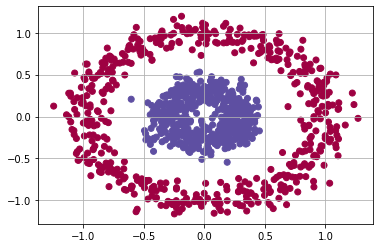

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_moons

X, Y = make_circles(1000, shuffle=True, noise=0.1, factor=0.3)
#X, Y = make_classification(10000, n_features=2, n_informative=2, n_redundant=0, 
#                          class_sep=2, n_clusters_per_class=2, random_state=20)
#X, Y = make_moons(10000, shuffle=True, noise=0.002)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Spectral")
plt.grid(True)
plt.show()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, 
                                test_size=0.33, random_state=10)

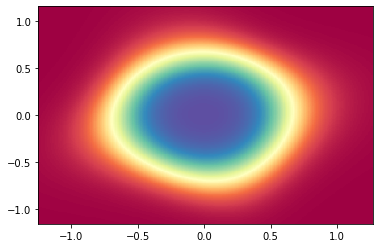

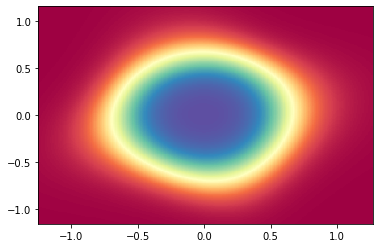

In [30]:
%matplotlib inline
nn = NeuralNet(
    layer_shapes=(
        (2, 100),
        (100, 100),
        (100, 1),
    ),
    visual_mode="inline"
)

nn.optimize(Xtrain, Ytrain, epochs=2000, batch_size=64, learning_rate=6e-2, show_after=2)


In [31]:
train_forwards = nn.forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission on Training Set: {round(precision, 2) * 100}%")

forwards = nn.forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission on Test set: {round(precision, 2) * 100}%")

Precission on Training Set: 100.0%
Precission on Test set: 100.0%


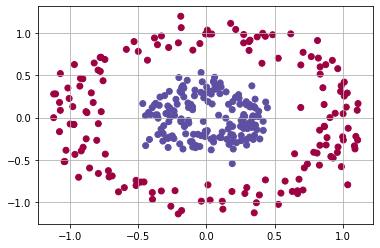

In [32]:
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=np.around(forwards[-1]), cmap="Spectral")
plt.grid(True)
plt.show()